# SPACY NLP Lecture

> https://spacy.io/

---

In [ ]:
# installation

# pip install spacy
# python -m spacy download en_core_web_lg

### Spacy

- Non-destructive tokenization
- Named entity recognition
- Support for 53+ languages
- pretrained word vectors
- State-of-the-art speed
- Easy deep learning integration
- Part-of-speech tagging
- Labelled dependency parsing
- Built in visualizers
- Convenient string-to-hash mapping
- Export to numpy data arrays
- Efficient binary serialization
- Easy model packaging and deployment
- Robust, rigorously evaluated accuracy

### Word Embedding

Spacy is a model that produces **word embeddings**. These word embeddings are generated from a shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words.

Spacy takes as its input a large corpus of text and produces a vector space, typically of **several hundred dimensions**, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are 
positioned in the vector space such that **words that share common contexts in the corpus are located close to one another in the space**.

In [2]:
import spacy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
text = """
As all of you know, there are millions of gigabytes every day are generated by blogs, social websites, and web pages.
There are many companies gathering all of these data for understanding users and their passions and give these reports to the companies to adjust their plans.
Suppose a person loves traveling and is regularly searching for a holiday destination, the searches made by the user is used to provide him with relative advertisements by online hotel and flight booking apps.
You know what, search engines are not the only implementation of natural language processing (NLP) and there are a lot of awesome implementations out there.
"""

In [5]:
# NOTE
# You can create a custom tokenizer for Spacy where you lowercase, remove stop words, 
# punctuation, stem, lemmatize, etc.

In [6]:
doc = nlp(text)

In [7]:
# doc to sentence
for i, s in enumerate(doc.sents):
    print(i, s)
    print('-' * 100)

0 
As all of you know, there are millions of gigabytes every day are generated by blogs, social websites, and web pages.

----------------------------------------------------------------------------------------------------
1 There are many companies gathering all of these data for understanding users and their passions and give these reports to the companies to adjust their plans.

----------------------------------------------------------------------------------------------------
2 Suppose a person loves traveling and is regularly searching for a holiday destination, the searches made by the user is used to provide him with relative advertisements by online hotel and flight booking apps.

----------------------------------------------------------------------------------------------------
3 You know what, search engines are not the only implementation of natural language processing (NLP) and there are a lot of awesome implementations out there.

----------------------------------------

In [8]:
# tokenization
for i, token in enumerate(doc[:15]):
    print(i, token.text, token.tag_, token.lemma_, token.lower_, 
          token.pos, token.is_stop, spacy.explain(token.tag_))

0 
 _SP 
 
 103 False None
1 As IN as as 98 True conjunction, subordinating or preposition
2 all DT all all 90 True determiner
3 of IN of of 85 True conjunction, subordinating or preposition
4 you PRP -PRON- you 95 True pronoun, personal
5 know VBP know know 100 False verb, non-3rd person singular present
6 , , , , 97 False punctuation mark, comma
7 there EX there there 95 True existential there
8 are VBP be are 87 True verb, non-3rd person singular present
9 millions NNS million millions 92 False noun, plural
10 of IN of of 85 True conjunction, subordinating or preposition
11 gigabytes NNS gigabyte gigabytes 92 False noun, plural
12 every DT every every 90 True determiner
13 day NN day day 92 False noun, singular or mass
14 are VBP be are 87 True verb, non-3rd person singular present


In [9]:
# language diagnostics
nlp('sally likes to run').to_json()

{'text': 'sally likes to run',
 'ents': [{'start': 0, 'end': 11, 'label': 'PERSON'}],
 'sents': [{'start': 0, 'end': 18}],
 'tokens': [{'id': 0,
   'start': 0,
   'end': 5,
   'pos': 'PROPN',
   'tag': 'NNP',
   'dep': 'nsubj',
   'head': 1},
  {'id': 1,
   'start': 6,
   'end': 11,
   'pos': 'VERB',
   'tag': 'VBZ',
   'dep': 'ROOT',
   'head': 1},
  {'id': 2,
   'start': 12,
   'end': 14,
   'pos': 'PART',
   'tag': 'TO',
   'dep': 'aux',
   'head': 3},
  {'id': 3,
   'start': 15,
   'end': 18,
   'pos': 'VERB',
   'tag': 'VB',
   'dep': 'xcomp',
   'head': 1}]}

In [10]:
nlp('dog').vector[:10]

array([-0.40176 ,  0.37057 ,  0.021281, -0.34125 ,  0.049538,  0.2944  ,
       -0.17376 , -0.27982 ,  0.067622,  2.1693  ], dtype=float32)

In [11]:
nlp('cat').vector[:10]

array([-0.15067 , -0.024468, -0.23368 , -0.23378 , -0.18382 ,  0.32711 ,
       -0.22084 , -0.28777 ,  0.12759 ,  1.1656  ], dtype=float32)

In [12]:
words = ['car', 'truck', 'dragon', 'lion', 'man', 'woman' , 
         'girl', 'boy', 'king', 'queen', 'sun', 'moon', 'mars', 'venus',
         'denver', 'san francisco', 'seattle']
vectors = [nlp(w).vector for w in words]

In [37]:
v_2d = PCA(n_components=2).fit_transform(vectors); v_2d[:5]

array([[-1.53451704,  4.41922179],
       [-1.46115641,  4.13592924],
       [-0.07480133, -2.07265571],
       [-0.11389675, -1.37517149],
       [-3.19439482,  0.22380073]])

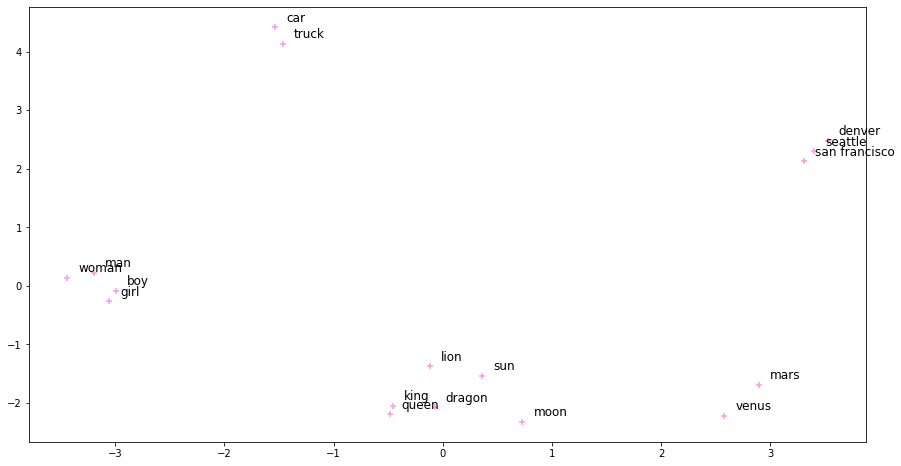

In [36]:
plt.figure(figsize=(15,8))
plt.scatter(v_2d[:,0], v_2d[:,1], c='#ff33cc', marker='+', alpha=0.5)
for word, coord in zip(words, v_2d):
    x, y = coord
    plt.text(x + 0.1, y + 0.1, word, size=12, c='black')

In [15]:
for a, b in combinations([nlp(w) for w in words], 2):
    print("{:<15} {:<15} {:.2f}\t{:.2f}".format(a.text, b.text, a.similarity(b), np.rad2deg(np.arccos(a.similarity(b)))          ))

car             truck           0.71	44.66
car             dragon          0.18	79.62
car             lion            0.18	79.91
car             man             0.35	69.26
car             woman           0.33	70.56
car             girl            0.33	70.80
car             boy             0.33	70.88
car             king            0.15	81.52
car             queen           0.12	82.95
car             sun             0.26	74.87
car             moon            0.19	79.04
car             mars            0.08	85.59
car             venus           0.02	89.06
car             denver          0.27	74.46
car             san francisco   0.28	73.79
car             seattle         0.28	73.73
truck           dragon          0.17	80.02
truck           lion            0.21	77.95
truck           man             0.37	68.02
truck           woman           0.31	72.15
truck           girl            0.28	73.89
truck           boy             0.30	72.57
truck           king            0.21	77.81
truck      

In [16]:
np.rad2deg(np.arccos(nlp('i love this song').similarity(nlp('the worst sucks bad terrible'))))

49.46872103743745

In [17]:
np.rad2deg(np.arccos(nlp('i love this song').similarity(nlp('i like how this sounds'))))

28.042700280342753

In [18]:
for label, word in zip(KMeans(n_clusters=5).fit(np.array(vectors)).labels_, words):
    print(label, '---', word)

4 --- car
4 --- truck
3 --- dragon
3 --- lion
2 --- man
2 --- woman
2 --- girl
2 --- boy
3 --- king
3 --- queen
0 --- sun
0 --- moon
0 --- mars
0 --- venus
1 --- denver
1 --- san francisco
1 --- seattle
